In [352]:
# Importing the libraries

import cv2
from deepface import DeepFace
import matplotlib.pyplot as plt

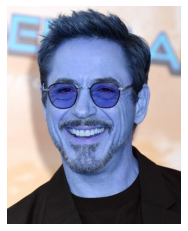

In [343]:
# load the image
image = cv2.imread(r'C:\Users\prabhitha.nagarajan\Documents\Projects\RDJ_HAPPY.jpg')

# Displaying the image 
plt.axis("off")
plt.imshow(image)

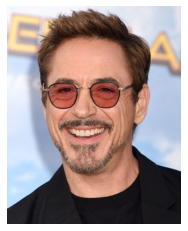

In [340]:
# By default cv2 displays images in BGR(Blue,Green,Red) format. We are converting it to RGB.

# Displaying the image 
plt.axis("off")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [325]:
# Loading the pre-trained DeepFace model

predictions = DeepFace.analyze(image)

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:28<00:00,  7.13s/it]


In [326]:
predictions

{'emotion': {'angry': 5.69619108083056e-08,
  'disgust': 3.1070864423150083e-13,
  'fear': 2.130725735972857e-11,
  'happy': 99.9999463558165,
  'sad': 1.3578462719752345e-06,
  'surprise': 7.25795497813735e-11,
  'neutral': 5.4453287083243254e-05},
 'dominant_emotion': 'happy',
 'region': {'x': 35, 'y': 78, 'w': 258, 'h': 258},
 'age': 53,
 'gender': 'Man',
 'race': {'asian': 0.024189992109313607,
  'indian': 0.2852343022823334,
  'black': 0.016142033564392477,
  'white': 72.07229137420654,
  'middle eastern': 13.463360071182251,
  'latino hispanic': 14.138786494731903},
 'dominant_race': 'white'}

In [327]:
predictions['dominant_emotion']

'happy'

In [335]:
# To detect the faces 

# Load some pre-trained data on face frontals from Opencv (haar cascade algorithm)
trained_face_data = cv2.CascadeClassifier(r'C:\Users\prabhitha.nagarajan\Documents\Projects\haarcascade_frontalface_default.xml')

# Must convert to grayscale
grayscaled_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces
face_coordinates = trained_face_data.detectMultiScale(grayscaled_img)

print(face_coordinates)

# Draw rectangle around the faces
length = len(face_coordinates)
for i in range(length):
    (x,y,w,h) = face_coordinates[i]
    cv2.rectangle(image, (x,y), (x+w,y+h), (0,255,0), 8)

[[ 35  78 258 258]]


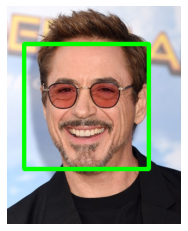

In [329]:
# Displaying the image 
plt.axis("off")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

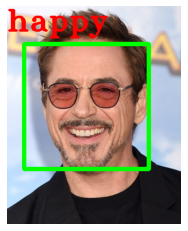

In [336]:
font = cv2.FONT_HERSHEY_TRIPLEX

cv2.putText(image, predictions['dominant_emotion'], (0,50), font, 2, (0,0,255), 3, cv2.LINE_4)

# Displaying the image 
plt.axis("off")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.86it/s]


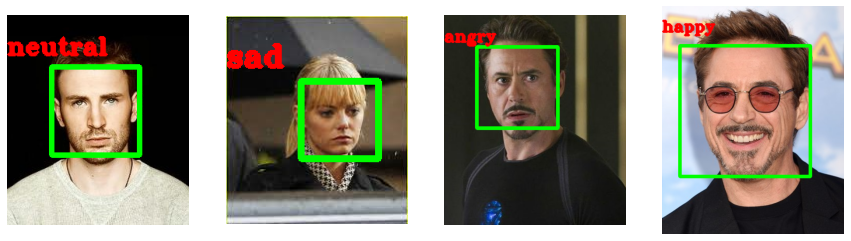

In [401]:
# Recognizing face emotions on multiple images

images = [cv2.imread(file) for file in glob.glob(r"C:\Users\prabhitha.nagarajan\Documents\Projects\Multiple Images\*.jpg")]
trained_face_data = cv2.CascadeClassifier(r'C:\Users\prabhitha.nagarajan\Documents\Projects\haarcascade_frontalface_default.xml')

# generate samples and plot
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15,15))

for i in range(len(images)):
    predictions = DeepFace.analyze(images[i])
    grayscaled_img = cv2.cvtColor(images[i], cv2.COLOR_BGR2GRAY)
    face_coordinates = trained_face_data.detectMultiScale(grayscaled_img)
    length = len(face_coordinates)
    for j in range(length):
        (x,y,w,h) = face_coordinates[j]
        cv2.rectangle(images[i], (x,y), (x+w,y+h), (0,255,0), 5)
    font = cv2.FONT_HERSHEY_TRIPLEX

    cv2.putText(images[i], predictions['dominant_emotion'], (0,50), font, 1, (0,0,255), 3, cv2.LINE_4)

    # Displaying the image 
    ax[i].axis("off")

    ax[i].imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))